#**Welcome to FinMark Solutions**

At FinMark Corporaton, we specialize in offering a wide range of services designed to empower businesses with the insights and strategies needed to succeed in today's competitive market. Our core services include financial analysis, marketing analytics, and business intelligence. We are dedicated to serving small and medium enterprises (SMEs) across Southeast Asia, helping them optimize their marketing strategies and financial planning through advanced data analytics.

**Problem Statement:** FinMark Corporation uses manual methods for sales forecasting and analysis and customer segmentation. As the company grows, this approach can’t keep up with the increasing data, causing delays and missed opportunities.

**Project Deliverables:** As their data analyst, the company wants you, to automate these processes using machine learning and predictive analytics to improve efficiency and adapt quickly to market changes.

## **CUSTOMER DATA**

In [1]:
# Importing Necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

1. Load Datasets

In [2]:
customers = pd.read_csv('customers_data.csv')
products = pd.read_csv('products_data.csv')
transactions = pd.read_csv('transactions_data.csv')

2. Preprocess Customer Data

In [3]:
# Fill missing values in Company_Profit with median
customers["Company_Profit"].fillna(customers["Company_Profit"].median(), inplace=True)

In [4]:
# Extract city from the Address column
customers['Address'] = customers['Address'].str.split(',').str[2].str.strip().str.upper()

In [5]:
#Imputing missing company ID
company_id=[]
for i in range(1, len(customers)+1):
  company_id.append(i)

customers['Company_ID']= company_id

In [6]:
customers.head()

,Company_ID,Company_Name,Company_Profit,Address
0,1,Tech Enterprises 1,80701.0,PASIG
1,2,Global Partners 2,80511.0,TAGUIG
2,3,Quantum Associates 3,110664.0,PASIG
3,4,Prime Network 4,75301.5,TAGUIG
4,5,Elite Ventures 5,69427.0,MAKATI


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_ID      100 non-null    int64  
 1   Company_Name    100 non-null    object 
 2   Company_Profit  100 non-null    float64
 3   Address         100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


## **PRODUCTS DATA**

3. Preprocess Products Data

In [8]:
#Imputing missing product ID
product_id= []
for i in range(1, len(products)+1):
  product_id.append(i)

products['Product_ID']= product_id

In [9]:
# Clean and convert Product_Price to integer
products['Product_Price'] = products['Product_Price'].str.replace('?', '').str.replace(',', '').astype(int)

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     20 non-null     int64 
 1   Product_Name   20 non-null     object
 2   Product_Price  20 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 528.0+ bytes


In [11]:
products.head()

,Product_ID,Product_Name,Product_Price
0,1,FinPredictor Suite,140000
1,2,MarketMinder Analytics,168000
2,3,TrendWise Forecaster,100800
3,4,CustomerScope Insights,123200
4,5,SalesSync Optimizer,84000


## **TRANSACTION DATA**

4. Preprocess Transaction Data

In [12]:
transactions.head()

,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,0.0,1.0,88.0,6.0,NaN,2024/03/26,194379.147964,1075200.0
1,1.0,2.0,29.0,19.0,16.0,"July 09, 2024",97930.993380,1428000.0
2,2.0,NaN,28.0,18.0,6.0,04/13/2024,126095.547778,940800.0
3,3.0,4.0,85.0,12.0,12.0,09-06-2023,NaN,1008000.0
4,4.0,5.0,47.0,3.0,8.0,07/06/2021,99575.609634,705600.0


In [13]:
# Drop unnecessary columns
transactions.drop(columns=['Unnamed: 0', 'Transaction_ID'], inplace=True)

In [14]:
# Merge transactions with customers and products data
df = transactions.merge(products, on='Product_ID').merge(customers, on='Company_ID')

In [15]:
# Keep only relevant columns
df= df[['Transaction_Date','Company_Name', 'Product_Name', 'Address', 'Product_Price_y', 'Quantity', 'Total_Cost']]

In [16]:
# Convert Transaction_Date to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format= 'mixed')
# Extract time-based features
df['Month'] = df['Transaction_Date'].dt.month
df['Day'] = df['Transaction_Date'].dt.day
df['Year'] = df['Transaction_Date'].dt.year

In [17]:
# Fill missing Total_Cost values based on Quantity * Product_Price
df['Total_Cost'] = df['Total_Cost'].fillna(df['Product_Price_y'] * df['Quantity'])

In [18]:
# Recalculate Quantity where necessary
df['Quantity'] = df['Total_Cost'] / df['Product_Price_y']

In [19]:
# Drop redundant columns
df.drop(columns=['Transaction_Date'], inplace=True)

In [20]:
# Remove rows with missing Quantity or Total_Cost
df.dropna(subset=['Quantity', 'Total_Cost'], inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8008 entries, 0 to 8092
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company_Name     8008 non-null   object 
 1   Product_Name     8008 non-null   object 
 2   Address          8008 non-null   object 
 3   Product_Price_y  8008 non-null   int32  
 4   Quantity         8008 non-null   float64
 5   Total_Cost       8008 non-null   float64
 6   Month            8008 non-null   int32  
 7   Day              8008 non-null   int32  
 8   Year             8008 non-null   int32  
dtypes: float64(2), int32(4), object(3)
memory usage: 500.5+ KB


In [22]:
df.head()

,Company_Name,Product_Name,Address,Product_Price_y,Quantity,Total_Cost,Month,Day,Year
0,Elite Consulting 88,RevenueVue Dashboard,TAGUIG,179200,6.0,1075200.0,3,26,2024
1,Elite Consulting 88,RevenueVue Dashboard,TAGUIG,179200,20.0,3584000.0,7,17,2024
2,Elite Consulting 88,RevenueVue Dashboard,TAGUIG,179200,20.0,3584000.0,8,27,2022
3,Elite Consulting 88,RevenueVue Dashboard,TAGUIG,179200,4.0,716800.0,3,26,2021
4,Elite Consulting 88,RevenueVue Dashboard,TAGUIG,179200,10.0,1792000.0,5,5,2021


## Predictive Analytics

5. Encode Categorical Features

In [23]:
# Label Encoding Company Name and Product Name
label_encoder = LabelEncoder()
df["Company_Name"] = label_encoder.fit_transform(df["Company_Name"])
df["Product_Name"] = label_encoder.fit_transform(df["Product_Name"])

In [24]:
# One-hot encoding for Address
df = pd.get_dummies(df, columns=["Address"], drop_first=True, dtype=int)

In [25]:
df.head()

,Company_Name,Product_Name,Product_Price_y,Quantity,Total_Cost,Month,Day,Year,Address_CEBU CITY,Address_DAVAO CITY,Address_MAKATI,Address_MANDALUYONG,Address_MANILA,Address_PARAÑAQUE,Address_PASIG,Address_QUEZON CITY,Address_TAGUIG
0,9,14,179200,6.0,1075200.0,3,26,2024,0,0,0,0,0,0,0,0,1
1,9,14,179200,20.0,3584000.0,7,17,2024,0,0,0,0,0,0,0,0,1
2,9,14,179200,20.0,3584000.0,8,27,2022,0,0,0,0,0,0,0,0,1
3,9,14,179200,4.0,716800.0,3,26,2021,0,0,0,0,0,0,0,0,1
4,9,14,179200,10.0,1792000.0,5,5,2021,0,0,0,0,0,0,0,0,1


6. Train Machine Learning Model

In [26]:
# Define features (X) and target (y)
X = df.drop(columns=["Product_Name"])
y = df["Product_Name"]

In [27]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [30]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.787765293383271


7. Predict Using Manual Input

In [31]:
# Example manual input: Predict what Tech Enterprises 1 would likely purchase
manual_input = [[1, 100000, 10, 1000000, 3, 30, 2025, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
predicted_product = model.predict(manual_input)

print("Predicted Product:", predicted_product)

Predicted Product: [6]


Predicting what Tech Enterprises 1 would likely purchase with 10 quantities and total budget of 1,000,000 on March 30, 2025 would give us RevenueVue Dashboard

## Time Series Analysis

8. Preprocess data

In [32]:
# Merge transactions with customers and products data
transactions = transactions.merge(products, on='Product_ID').merge(customers, on='Company_ID')

# Fill missing Total_Cost values based on Quantity * Product_Price
transactions['Total_Cost'] = transactions['Total_Cost'].fillna(transactions['Product_Price_y'] * transactions['Quantity'])

# Recalculate Quantity where necessary
transactions['Quantity'] = transactions['Total_Cost'] / transactions['Product_Price_y']

# Keep only relevant columns
transactions= transactions[['Transaction_Date', 'Total_Cost']]

In [33]:
# Converting to date datatype
transactions['Transaction_Date']= pd.to_datetime(transactions['Transaction_Date'], format= 'mixed')
transactions= transactions.set_index('Transaction_Date')

In [34]:
# Dropping null values
transactions.dropna(subset= ['Total_Cost'], inplace= True)

#Sorting data
transactions= transactions.sort_index()

9. Plot data

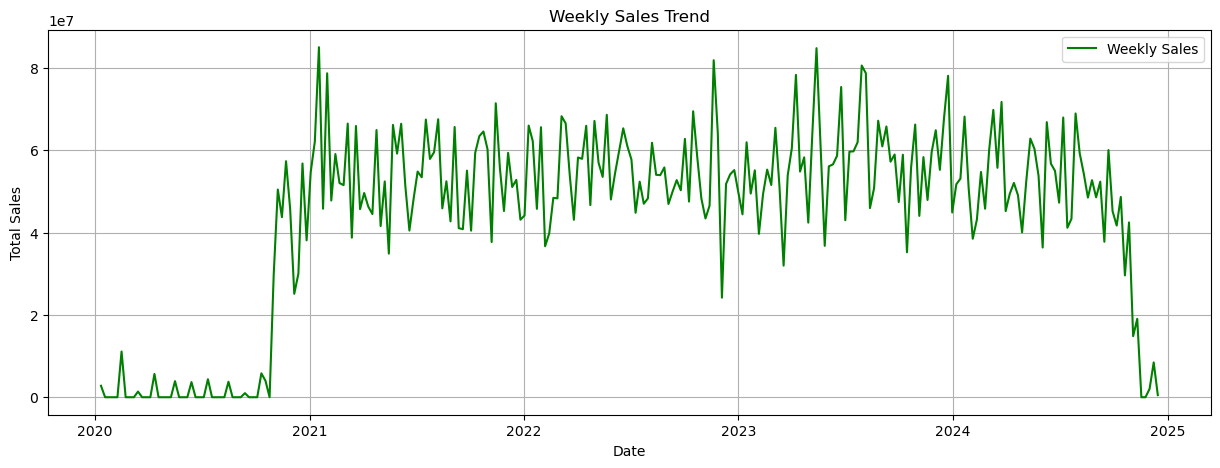

In [42]:
# Plotting the monthly sales
df_weekly = transactions.resample("W")["Total_Cost"].sum()
plt.figure(figsize= (15,5))
sns.lineplot(data= df_weekly, color="g", label="Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Weekly Sales Trend")
plt.grid(True)
plt.legend()
plt.show()

10. Perform analysis with ARIMA

In [36]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
df_daily = transactions.resample("D")["Total_Cost"].sum()
adf_result = adfuller(df_daily)

# Display ADF test results
adf_output = {
    "ADF Statistic": adf_result[0],
    "p-value": adf_result[1],
    "Critical Values": adf_result[4],
    "Stationary": adf_result[1] < 0.05
}

adf_output

{'ADF Statistic': -3.2228692795880978,
 'p-value': 0.018698496565395416,
 'Critical Values': {'1%': -3.434031147125674,
  '5%': -2.863166021720215,
  '10%': -2.5676356430449427},
 'Stationary': True}

ADF Test Results show that the data is already stationary, d = 0 in ARIMA (no need for differencing).

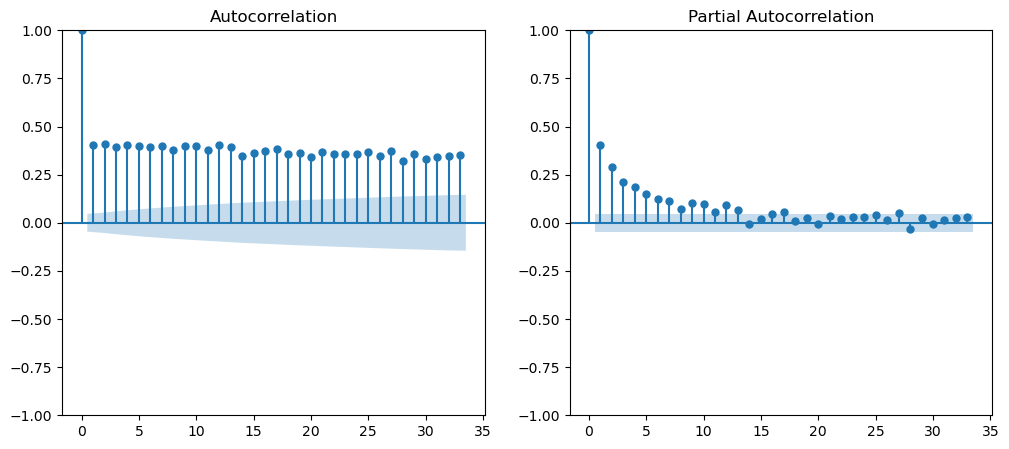

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to determine p and q values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df_daily, ax=axes[0])
plot_pacf(df_daily, ax=axes[1])
plt.show()

The ACF and PACF plots will help identify the appropriate values for p (autoregressive order) and q. To automate the selection process we will next use auto_arima from pmdarima

In [38]:
from pmdarima import auto_arima

# Fit Auto-ARIMA model
auto_model = auto_arima(df_daily.values, seasonal=False, trace=True, suppress_warnings=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=59366.417, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60498.764, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=59973.534, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=59378.899, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=60496.764, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=59382.663, Time=0.61 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=59368.215, Time=0.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=59357.950, Time=3.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=59359.857, Time=3.64 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=59359.841, Time=4.05 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=59363.953, Time=0.67 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=59366.718, Time=0.97 sec
 ARIMA(2,1,3)(0,0,0)[0]        

Summary shows that the best values for ARIMA is (2,1,3). But our earlier analysis showed that the data is stationary. But using the ACF plot we can see that the autocorrelation values decline very slowly which suggests the presence of a trend, which means differencing (d=1) might be needed. Therefore we will use (2,1,3)

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model (using estimated values from ACF/PACF)
model_arima = ARIMA(df_daily, order=(2, 1, 3))
model_fit = model_arima.fit()

# Display summary of the ARIMA model
model_fit.summary()

C:\Users\KrisChan\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Total_Cost   No. Observations:                 1796
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -29671.980
Date:                Thu, 20 Mar 2025   AIC                          59355.960
Time:                        12:43:24   BIC                          59388.917
Sample:                    01-11-2020   HQIC                         59368.128
                         - 12-10-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1818      0.021    -55.535      0.000      -1.224      -1.140
ar.L2         -0.9617      0.021    -46.481      0.000      -1.002      -0.921
ma.L1          0.2495      0.018     13.864      0.000       0.214       0.285
ma.L2         -0.1473      0.017     -8.638      0.000      -0.181      -0.114
ma.L3         -0.9242      0.016    -58.721      0.000      -0.955      -0.893
sigma2      1.407e+13   2.63e-17   5.34e+29      0.000    1.41e+13    1.41e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):               324.87
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.31e+44. Standard errors may be unstable.
"""

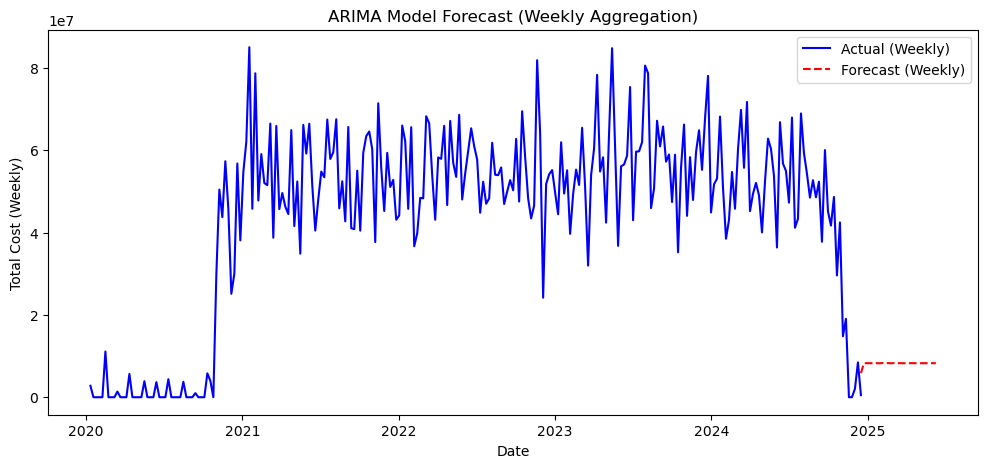

In [40]:
# Resample actual data to weekly frequency (sum of Total_Cost per week)
df_weekly = df_daily.resample("W").sum()

forecast_steps = 180
forecast = model_fit.forecast(steps=forecast_steps)


# Resample forecast to weekly frequency
forecast_weekly = forecast.resample("W").sum()

# Create a date index for weekly forecast
forecast_weekly_dates = pd.date_range(start=df_weekly.index[-1], periods=len(forecast_weekly)+1, freq="W")[1:]

# Create a date index for weekly forecast
forecast_weekly_dates = forecast_weekly.index

# Plot weekly actual vs. forecasted values
plt.figure(figsize=(12, 5))
plt.plot(df_weekly.index, df_weekly, label="Actual (Weekly)", color="blue")
plt.plot(forecast_weekly_dates, forecast_weekly, label="Forecast (Weekly)", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Total Cost (Weekly)")
plt.title("ARIMA Model Forecast (Weekly Aggregation)")
plt.legend()
plt.show()

The model predicts after the steep decline, predicted sales will show an upward trend, but will remain flat for next 6 months